## INTRO

In computing terms, a decision tree is a tree in which each node represents a feature or attribute, each link or branch represents a decision, and each leaf represents an outcome, which can either be a categorical or continuous value.

A decision tree is a supervised learning algorithm that can be, and is, used for both classification (for categorical variable) and regression (for numeric continuous variable) modeling. Regression is a method used for predictive modeling, so these trees are used to either classify data or predict what will come next.

#### BUSINESS PROBLEM

 Imagine you work in the finance industry and have data on people who are not yet your customers.
 
 Your Head of Department asks you to come up with a strategy to acquire high-value customers from that data.
 
 The execution has to be aggressive, but we need to target those customers who earn above 1,000 USD for this particular campaign.
 
 Their salary data is not available because our data collection did not include salary data, but we have some of their attributes or features (e.g. their job title, place of work, and their highest level of education).
 
 What can we do with this data to predict their salaries? We can use the existing data of our customers who earn above 1,000 USD to build and train a decision model which can later be used on the new data to predict the salaries of these users.

This is a supervised classification problem

#### DATA COLLECTION

In [10]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier # if it were a regression task, we would import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('salaries.csv')

In [3]:
# taking a peek at the data

df.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,sales executive,bachelors,1
3,google,sales executive,masters,1
4,google,sales executive,bachelors,1


#### DATA ASSESSMENT/CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                24 non-null     object
 1   job                    24 non-null     object
 2   degree                 24 non-null     object
 3   salary_more_than_100k  24 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 900.0+ bytes


The results above show that our dataset is clean and we can proceed

#### EDA

In [5]:
df.describe()

,salary_more_than_100k
count,24.000000
mean,0.500000
std,0.510754
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


The summary statistics of the numerical column is very OK. No indication of outliers

#### DATA PREPROCESSING

Now, we need to split the dataset into target(dependent) and predictor (independent variables) dataframes

In [22]:
# obtaining our independent variables dataframe (that is dataframe consisting of only the predictor
# variables), which we will call df_predictor, we drop the column 'salary_more_than_100k', since it is
# the target variable. Since inplace keywaord is not used, the original df is not affected

df_predictors = df.drop('salary_more_than_100k', axis = 'columns') # Could also use axis = 1

In [24]:
# checking to see

df_predictors.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,sales executive,bachelors
3,google,sales executive,masters
4,google,sales executive,bachelors


In [25]:
# obtaining our target dataframe (that is, dataframe containing only the target variable,
# 'salary_more_than_100k'), we use the df.column pandas method

df_target = df.salary_more_than_100k

In [26]:
# checking to confirm

df_target.head()

0    0
1    0
2    1
3    1
4    1
Name: salary_more_than_100k, dtype: int64

At this stage, we should be ready to build and train our model with the dataset.

However, looking at our predictor df, we see categorical variables composed of string characters. Since machine learning algorithms only understand and use numeric data, we need to convert these to numeric variables. We can do this using the encoder function from sklearn.preprocessing.

After importing our label encoder, we need to create an object of class using the label encoder. For each of the columns in the predictor df, we will create a label encoder object which will convert these to numerical values.

In [30]:
from sklearn.preprocessing import LabelEncoder  # Could have also input this in the first cell and run again

In [31]:
# now, creating a label encoder object for each of the columns in the predictors df to convert these
# to numerical values.

company_enc = LabelEncoder()
job_enc= LabelEncoder()
degree_enc= LabelEncoder()

In [32]:
# creating 3 new extra columns (company_num, job_num and degree_num) and assigning values to the new
# columns using the fit_transform method, and then appending/attaching these 3 new columns to the
# predictors df

df_predictors['company_num'] = company_enc.fit_transform(df_predictors['company'])
df_predictors['job_num'] = job_enc.fit_transform(df_predictors['job'])
df_predictors['degree_num'] = degree_enc.fit_transform(df_predictors['degree'])

In [33]:
# checking to see all went well

df_predictors.head()

,company,job,degree,company_num,job_num,degree_num
0,google,sales executive,bachelors,1,4,0
1,google,sales executive,masters,1,4,1
2,google,sales executive,bachelors,1,4,0
3,google,sales executive,masters,1,4,1
4,google,sales executive,bachelors,1,4,0


In [34]:
# now we will drop the columns company, job and degree from the predictors df so we cam have only
# numeric data for our training. let's call the new df as df_predictors_num

df_predictors_num = df_predictors.drop(['company', 'job', 'degree'], axis = 'columns')

In [36]:
# checking to see

df_predictors_num.head()

,company_num,job_num,degree_num
0,1,4,0
1,1,4,1
2,1,4,0
3,1,4,1
4,1,4,0


Now that we have our entire dataset as numeric data we can build our model

#### MODEL BUILDING

In [37]:
# Model would also work without this step

from sklearn import tree

In [46]:
# instantiating our decision tree model.
# We would achieve same results with model = DecisionTreeClassifier()

dt = tree.DecisionTreeClassifier() # if it were a regression task, we would use DecisionTreeRegressor

#### MODEL TRAINING

In [47]:
# passing our two dfs through the model to train it

dt.fit(df_predictors_num, df_target)

DecisionTreeClassifier()

Now that we have successfully trained our model, we test our model

#### MODEL TESTING

In [48]:
# Let's pass some random variables through our model to see what it predicts. We use [1, 4, 0], 
# corresponding to n individual who works for google, is a sales executive and holds a bachelors degree.

dt.predict([[1, 4, 0]])

C:\Users\GCA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

The result of 1 implies that an an individual who works for google, is a sales executive and holds a bachelors degree probably earns up to a 100k and belongs to the category of potential clients we are targeting for our campaign


If we had a new dataset containing corresponding predictor variables without the labels (target column), we could simply pass the dataset into our model as we did in the cell above, and we would obtain the score (corresponding target variable values) or predictions of the model respectively.

#### MODEL EVALUATION

At this stage, we should evaluate the performance of the model on the test dataset.
But since we did not split our dataset, we cannot proceed.

Ideally, we should have splitted our dataset into train and test datasets, but because the dataset is so small we skipped this stage.

Let's visualize the tree

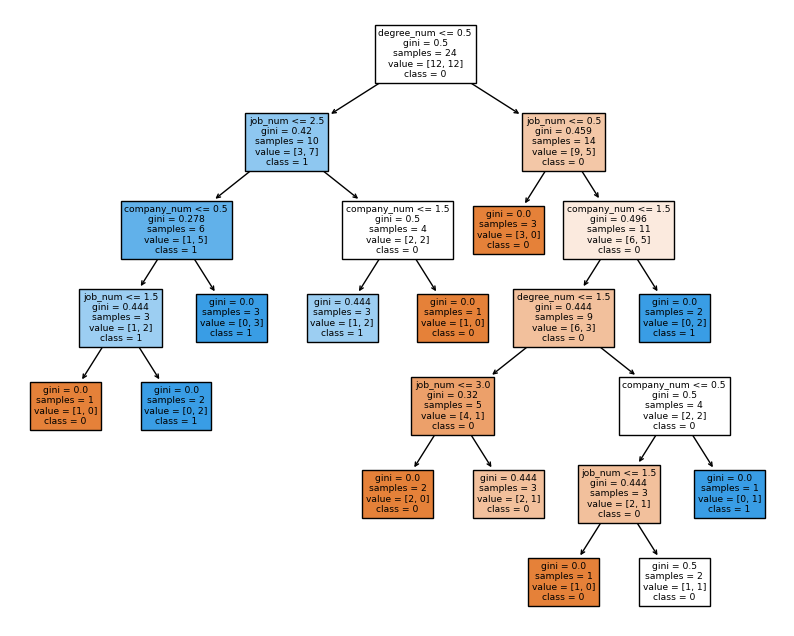

In [56]:
# from sklearn.tree import plot_tree

# Defining feature names and class names
feature_names = df_predictors_num.columns  # To contain the list of all the predictor variables
class_names = df_target.unique().astype(str)  # To show the unique values in the target column ['0', '1']

# Visualize the tree
plt.figure(figsize=(10, 8))
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

## OBSERVATIONS

Generally, decision tree algorithms are referred to as CART (Classification and Regression Trees).

While they are easy to understand and implement, one limitation of them is that a small variation in data could result to a completely different tree being generated, a concept known as variance. More so, one could create an over-complex decision tree that does not generalize well on data, a concept known as overfitting (when a ML model performs very well on train data but not on test data). Another challenge is biased data. It is recommended that we balance our dataset before fitting to our model.

Ideally, we would like to mitigate the errors due to variance and bias. The random forest model does well to take care of these issues.